In [25]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Reading Datasets.
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("Shape of train set: {}, Shape of test set: {}".format(train.shape,test.shape))

Shape of train set: (42000, 785), Shape of test set: (28000, 784)


In [27]:
# Data Normalisation.
train_data = train.loc[:, "pixel0":]
train_label = train.loc[:, "label"]

# Normalizing the images array to be in the range of 0-1 by dividing them by the max possible value. 
# Here is it 255 as we have 255 value range for pixels of an image. 
train_data = train_data/255.0
test = test/255.0

IMAGE LABEL: 9


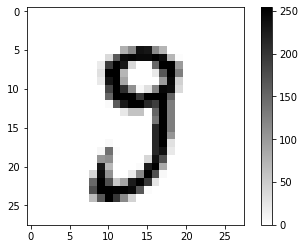

In [28]:
# Display Data
digit_array = train.loc[40, "pixel0":]
arr = np.array(digit_array) 
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(train.loc[40, "label"]))

In [29]:
# Converting dataframe into arrays
train_data = np.array(train_data)
train_label = np.array(train_label)

In [30]:
# Reshaping the input shapes to get it in the shape which the model expects to recieve later.
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
print(train_data.shape, train_label.shape)

(42000, 28, 28, 1) (42000,)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [32]:
# Encoding the labels and making them as the class value and finally converting them as categorical values.
nclasses = train_label.max() - train_label.min() + 1
train_label = to_categorical(train_label, num_classes = nclasses)
print("Shape of y_train after encoding: ", train_label.shape)

Shape of y_train after encoding:  (42000, 10)


In [33]:
def build_model(input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
def train_model(model, train, test, epochs, split):
    history = model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split)
    return history

In [34]:
cnn_model = build_model((28, 28, 1))
compile_model(cnn_model, 'adam', 'categorical_crossentropy')

model_history = train_model(cnn_model, train_data, train_label, 50, 0.2)

Epoch 1/50
1050/1050 [==============================] - 121s 115ms/step - loss: 0.3742 - accuracy: 0.8850 - val_loss: 0.1079 - val_accuracy: 0.9635
Epoch 2/50
1050/1050 [==============================] - 120s 114ms/step - loss: 0.1521 - accuracy: 0.9525 - val_loss: 0.0808 - val_accuracy: 0.9733
Epoch 3/50
1050/1050 [==============================] - 117s 112ms/step - loss: 0.1239 - accuracy: 0.9616 - val_loss: 0.0598 - val_accuracy: 0.9817
Epoch 4/50
1050/1050 [==============================] - 119s 113ms/step - loss: 0.1068 - accuracy: 0.9673 - val_loss: 0.0527 - val_accuracy: 0.9839
Epoch 5/50
1050/1050 [==============================] - 116s 110ms/step - loss: 0.1106 - accuracy: 0.9657 - val_loss: 0.1262 - val_accuracy: 0.9582
Epoch 6/50
1050/1050 [==============================] - 119s 113ms/step - loss: 0.1126 - accuracy: 0.9651 - val_loss: 0.0548 - val_accuracy: 0.9825
Epoch 7/50
1050/1050 [==============================] - 119s 113ms/step - loss: 0.0938 - accuracy: 0.9700 - val_

In [35]:
def plot_model_performance(metric, validations_metric):
    plt.plot(model_history.history[metric],label = str('Training ' + metric))
    plt.plot(model_history.history[validations_metric],label = str('Validation ' + metric))
    plt.legend()

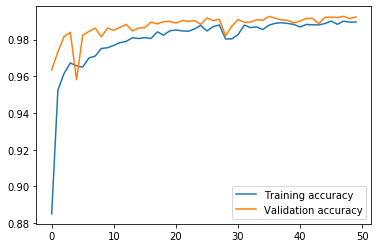

In [36]:
### Plotting the accuracy's
plot_model_performance('accuracy', 'val_accuracy')

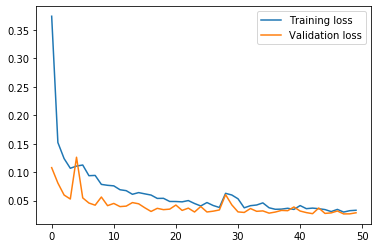

In [37]:
## Plotting the loss
plot_model_performance('loss', 'val_loss')

In [38]:
# reshaping the test arrays as we did to train images above somewhere.
test_arr = np.array(test)
test_arr = test_arr.reshape(test_arr.shape[0], 28, 28, 1)
print(test_arr.shape)

(28000, 28, 28, 1)


In [40]:
# Now, since the model is trained, it's time to find the results for the unseen test images.
predictions = cnn_model.predict(test_arr)

In [41]:
# Finally, making the final submissions
predictions_test = []

for i in predictions:
    predictions_test.append(np.argmax(i))


In [43]:
## Submitting in the required format
submission =  pd.DataFrame({
        "ImageId": test.index+1,
        "Label": predictions_test
    })

submission.to_csv('submission.csv', index=False)

In [44]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [46]:
cnn_model.save("model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit_recognition_model/assets
